In [1]:
# ------------------------------------------------------------------------------#
#     Project Name: Salary Prediction using Simple Linear Regression
#     Author: Dr. Saad Laouadi
#     
#     Description:
#     This project aims to predict salaries based on years of experience using
#     a Simple Linear Regression model. It demonstrates the application of
#     regression techniques in salary forecasting and data analysis.
#
#     Data Source:
#     The dataset used in this project includes salary data along with the
#     corresponding years of professional experience.
#     source: https://datasets.mlpack.org/Salary_Data.csv)
# 
#     Tools/Technologies:
#     - Python 3.11
#     - Pandas and NumPy for data manipulation
#     - Matplotlib and Seaborn for data visualization
#     - scikit-learn for implementing the regression model
#
#     Repository:
#     GitHub: https://github.com/DrSaadLa/OneMillionMLProjects.git
#
#     Dependencies:
#         
#
#     Created Date: 01-04-2023
#     Last Modified: 01-04-2023
#
#     License:
#     [Specify the license type if the project is open-source, e.g., MIT License]
#     
#     Contact Information:
#     - Email: dr.saad.economist@outlook.com
#     - LinkedIn: https://www.linkedin.com/in/saad-laouadi/
#     - X: https://twitter.com/DrSaadLa
#     - Facebook: https://www.facebook.com/DrSaadLaouadi
# ------------------------------------------------------------------------------# 

**Table of Contents**

1. [Project Overview](#Project-Overview)
    - Introduction to the Project
    - Significance of Simple Linear Regression in Salary Prediction
2. [Objective](#Objective)
    - Goals and Expected Outcomes
3. [Data Description](#Data-Description)
    - Overview of Dataset
    - Features and Target Variable Description
4. [Data Loading and Preprocessing](#Data-Loading-and-Preprocessing)
    - Importing Necessary Libraries
    - Loading the Dataset
    - Data Cleaning and Preprocessing Steps
5. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
    - Statistical Summary
    - Data Visualization (Scatter Plots, Correlation Analysis, etc.)
6. [Model Building](#Model-Building)
    - Linear Regression Model Overview
    - Training the Model
7. [Model Evaluation](#Model-Evaluation)
    - Evaluating Model Performance
    - Error Metrics Analysis
8. [Prediction and Interpretation](#Prediction-and-Interpretation)
    - Making Predictions
    - Interpretation of Results
9. [Conclusion](#Conclusion)
    - Summary of Findings
    - Future Work and Improvements
10. [References](#References)
    - Sources and Further Reading


In [2]:
# Environment Setup
import sys
# This to ensure using user defined modules
sys.path.append('../../utils/')

# This module installs and imports the project dependencies
from importlibs import *

pip is already up-to-date.
....................................................... 
Your working space has all the necessary working libs.
....................................................... 

                  Information about the working space                   
             The imported libraries with their versions are             
matplotlib   version is : 3.8.2
seaborn      version is : 0.13.1
pandas       version is : 2.1.4
polars       version is : 0.20.3
numpy        version is : 1.26.2
sklearn      version is : 1.3.2
statsmodels  version is : 0.14.1
Python version is: 3.11.6
Python executable path: /usr/local/opt/python@3.11/bin/python3.11


In [3]:
# the data directory
DATA_ROOT = pathlib.Path("../../datasets/")
SALARY_DATA = pathlib.Path.joinpath(DATA_ROOT, "Salary_Data.csv")

# Project Overview 

## Predicting Employee Salary with Linear Regression

- This project focuses on Simple Linear Regression (SLR) model to understand the relationship between an employee's years of experience and their salary. After training the model, we will test its predictive capabilities with a few examples.

### Objective

 - The aim is to forecast an employee's salary based on their years of experience.

### Data Description

- The dataset includes information for 30 company employees, spread across two columns:
    - **Years of Experience**: Indicating the number of years each employee has worked.
    - **Salary**: Representing the salary of each employee.

### Reading Data

In [4]:
salary = pd.read_csv(SALARY_DATA)

### Data Exploration 

In [5]:
# Check information 
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [6]:
# Check the first few observations
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
# Get Summary statistics about the data
salary.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


In [8]:
# The correlation
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


### Exploratory Data Analysis (EDA) 

#### The Target Variable



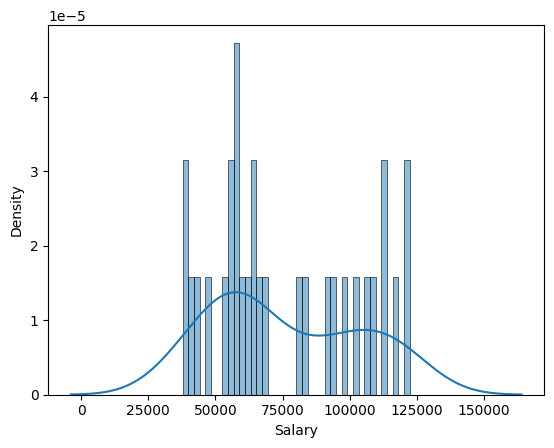

In [9]:
# The Distribution of the target variable
sns.histplot(data=salary,
             x="Salary",
             bins = 40, 
             kde = True,
             stat="density",
             kde_kws={
                 "cut":3
             }
            )
plt.show()

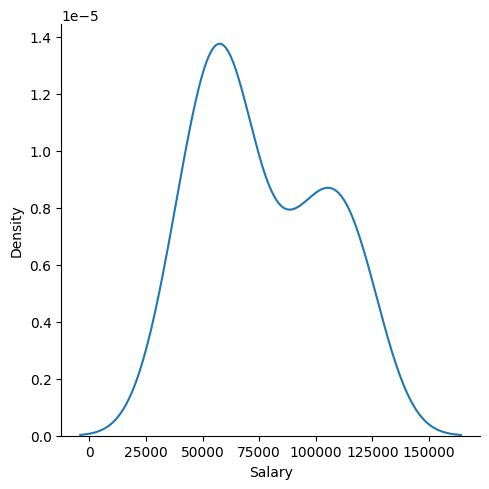

In [10]:
# The kernel density of the target variable
sns.displot(data = salary, x = "Salary", kind = "kde")
plt.show()

#### The Association between the Target Variable and the Input Feature

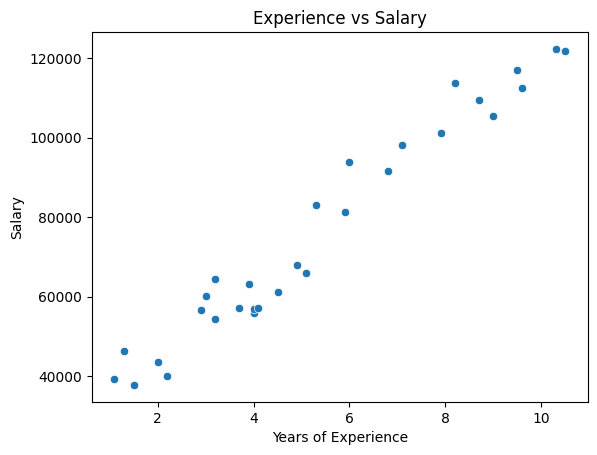

In [11]:
# Scatter plot of Experience vs Salary using Seaborn
sns.scatterplot(
    x="YearsExperience",
    y="Salary",
    data=salary
)

plt.title("Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

#### The Regression Plot 

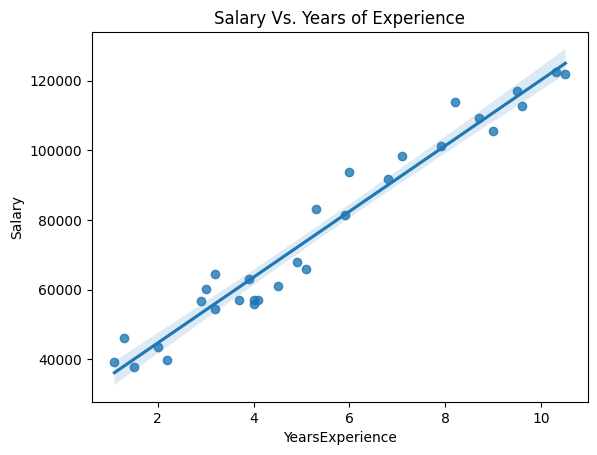

In [12]:
sns.regplot(
    data=salary,
    x = "YearsExperience",
    y= "Salary"
)

plt.title("Salary Vs. Years of Experience")
plt.show()

## Model Estimation 

### The Statistical Approach  

- In this approach we will focus on explanatory approach, in other words, the main objective of the model is to interpret the results. 

- We will use the `statsmodels` library in this section. 

In [13]:
# import the necessary module
import statsmodels.formula.api as smf

#### Model Fitting 

In [14]:
# Fit the model using the formula API
model = smf.ols('Salary ~ YearsExperience', data=salary).fit()

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           1.14e-20
Time:                        08:32:45   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     

### Understanding the Model Object 

In [15]:
print([attr for attr in dir(model) if not attr.startswith('_')])

['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'diagn', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'info_criteria', 'initialize', 'k_constant', 'llf', 'load', 'model', 'mse_model', 'mse_resid', 'mse_total', 'nobs', 'normalized_cov_params', 'outlier_test', 'params', 'predict', 'pvalues', 'remove_data', 'resid', 'resid_pearson', 'rsquared', 'rsquared_adj', 'save', 'scale', 'ssr', 'summary', 'summary2', 't_test', 't_test_pairwise', 'tvalues', 'uncentered_tss', 'use_t', 'wald_test', 'wald_test_terms', 'wresid']


In [16]:
#### 

In [17]:
# The Model parameters
print(f"{model.params.index[0]:<15}: {model.params.iloc[0]:.3f} : Std Err {model.bse.iloc[0]:.3f}" )
print(f"{model.params.index[1]:<15}: {model.params.iloc[1]:>9.3f} : Std Err {model.bse.iloc[1]:>8.3f}")

Intercept      : 25792.200 : Std Err 2273.053
YearsExperience:  9449.962 : Std Err  378.755


### The t-values 

In [18]:
# The t-values
print(model.tvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64


### The p-values 

In [19]:
# The p-values
print(model.pvalues)

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


### The Total Mean Squared Error 

This is the sum of squared differences between the observed values and the mean of the observed values, divided by the degrees of freedom (which is `n-1` where `n` is the number of observations). It's a part of the total variability of the dataset that the model seeks to explain.

Mathematically, it's expressed as:
$$\text{MSE}_{\text{total}} = \frac{\sum (y_i - \bar{y})^2}{n - 1}$$


- where:
    - $y_i$ is the observed value
    - $\bar{y}$ is the mean of the observed values
    - $n$ is the number of observations.

In [20]:
actual_y_values = salary.Salary

In [21]:
def total_mse(y):
    """Calculate the model mean squared of errors. """
    return np.sum((y - np.mean(y))**2) / (len(y)-1)

In [22]:
total_mse(actual_y_values)

751550960.4137931

In [23]:
model.mse_total
model.mse_model + model.mse_resid

20890353891.462585

### The Model Mean Squared Error (MSE Model)

The Model Mean Squared Error (MSE Model) quantifies the amount of variance in the dependent variable that is explained by the independent variables in the regression model. It is a measure of how well the regression line approximates the real data points. In regression analysis, a lower MSE Model indicates a model that more accurately fits the data.

Mathematically, MSE Model is expressed as:
$$\text{MSE}_{\text{model}} = \frac{\sum (\hat{y}_i - \bar{y})^2}{p}$$

- where:
    - $\hat{y}_i$ is the predicted value from the model
    - $\bar{y}$ is the mean of the observed values
    - $p$ is the number of predictors in the model

- The MSE Model represents the explained variation divided by the number of predictors, providing a normalized measure of the overall model fit.


#### Note 

> In a regression context, `mse_total` is used as a baseline to compare against the model's Mean Squared Error (MSE). While `mse_model` (Mean Squared Error of the model) tells you how much of the variance in the dependent variable the model is explaining, `mse_total` gives the total variance in the dependent variable.

> In the `statsmodels` output, you'll often see R-squared defined as 1 minus the ratio of `mse_model` over `mse_total`, which gives the proportion of the variance in the dependent variable that is predictable from the independent variables.

### The Residual Mean Squared Error (MSE Resid)

The Residual Mean Squared Error (MSE Resid) is a measure used in statistical models, particularly in regression analysis, to quantify the amount of variance in the dependent variable that is not explained by the independent variables in the model. It reflects the discrepancy between the actual observed data points and the model's predicted values.

Mathematically, MSE Resid is expressed as:
$$\text{MSE}_{\text{resid}} = \frac{\sum (y_i - \hat{y}_i)^2}{n - p - 1}$$

- where:
    - $y_i$ is the actual observed value
    - $\hat{y}_i$ is the predicted value from the model
    - $n$ is the number of observations
    - $p$ is the number of predictors in the model

MSE Resid is essentially the sum of the squares of the model residuals, divided by the degrees of freedom. It represents the unexplained variation by the model and is used as a key metric to assess the fit of a regression model.

## The Manual Calculation of MSEs

In [24]:
# Total Sum of Squares (TSS)
y = salary.Salary
tss = np.sum((y - np.mean(y))**2)
print(tss)
print(model.mse_total)
print(f"{model.mse_total * (len(y)-1)}")

21794977852.0
751550960.4137931
21794977852.0


In [25]:
# Explained Sum of Squares (ESS), also known as Model Sum of Squares (MSS)
ess = np.sum((model.fittedvalues - np.mean(y))**2)
print(ess)
print(model.ess)
print(model.mse_model)

20856849300.33159
20856849300.33157
20856849300.33157


In [26]:
# Residual Sum of Squares (RSS)
rss = np.sum(model.resid**2)
print(rss)
print(model.ssr)
print(rss/28)

938128551.6684291
938128551.6684291
33504591.131015327


In [27]:
# Verify the relationship: TSS = ESS + RSS
print(f"{'Total Sum of Squares (TSS)':<40}: {tss}")
print(f"{'Explained Sum of Squares (Model, ESS)':<40}: {ess}")
print(f"{'Residual Sum of Squares (RSS)':<40}: {rss}")
print(f"{'TSS = ESS + RSS':<40}: {ess + rss}")
print(f"{'Is TSS equal to ESS + RSS?':<40}: {np.isclose(tss, ess + rss)}")

Total Sum of Squares (TSS)              : 21794977852.0
Explained Sum of Squares (Model, ESS)   : 20856849300.33159
Residual Sum of Squares (RSS)           : 938128551.6684291
TSS = ESS + RSS                         : 21794977852.00002
Is TSS equal to ESS + RSS?              : True


### The MSEs Model Properties

In [28]:
print(f"{'The Mean Squared Error of the model': <40}: {model.mse_model}")
print(f"{'The Mean Squared Error of residuals': <40}: {model.mse_resid}")
print(f"{'The Total Mean Squared Error': <40}: {model.mse_total}")
print(f"{'The Sum Squared of Residuals': <40}: {model.ssr}")

The Mean Squared Error of the model     : 20856849300.33157
The Mean Squared Error of residuals     : 33504591.131015327
The Total Mean Squared Error            : 751550960.4137931
The Sum Squared of Residuals            : 938128551.6684291


## Model Assessment

### The R-Squared

R-Squared, also known as the coefficient of determination, is a statistical measure that represents the proportion of the variance for the dependent variable that's explained by the independent variables in a regression model. It provides an indication of the goodness of fit of a set of predictions to the actual values. In mathematical terms, R-Squared is defined as:

$$ R^2 = 1 - \frac{\text{Sum of Squares of Residuals}}{\text{Total Sum of Squares}} $$

$$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $$


- where:
    - $y_i$ is the actual value
    - $\hat{y}_i$ is the predicted value.
    - $\bar{y}$ is the mean of the actual values.

### The Adjusted R-Squared

While R-Squared is a useful statistic, it does not take into account the number of independent variables used to make the predictions. As more variables are added to a regression model, R-Squared tends to artificially increase, regardless of whether those variables are significant. This is where Adjusted R-Squared comes into play. It adjusts the R-Squared statistic based on the number of predictors in the model. The formula for Adjusted R-Squared is:

$$ \text{Adjusted } R^2 = 1 - \left( \frac{(1 - R^2)(n - 1)}{n - p - 1} \right) $$

- where:
    - $n$ is the number of observations.
    - $p$ is the number of predictors.
    - $R^2$ is the R-Squared of the model.


In [29]:
# Calculate R-squared
y = salary.Salary
y_pred = model.fittedvalues

ss_res = np.sum((y - y_pred) ** 2)      # Sum of squares of residuals
ss_tot = np.sum((y - np.mean(y)) ** 2)  # Total sum of squares
r_squared = 1 - (ss_res / ss_tot)

# Calculate Adjusted R-squared
n = len(y)                               # Number of observations
p = 1                                    # Number of predictors (excluding the intercept)

adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)


print(f"{'The R-squared':<25}: {r_squared}")
print(f"{'The Adjusted R-squared':<25}: {adjusted_r_squared}")

The R-squared            : 0.9569566641435086
The Adjusted R-squared   : 0.9554194021486339


- These two metrics are available in `rsquared` and `rsquared_adj` statsmodels model properties for $R^2$ and $\bar R^2$ repectively.

In [30]:
print(f"{'The R-squared':<25}: {model.rsquared}")
print(f"{'The Adjusted R-squared':<25}: {model.rsquared_adj}")

The R-squared            : 0.9569566641435086
The Adjusted R-squared   : 0.9554194021486339


#### Model Diagnostics 

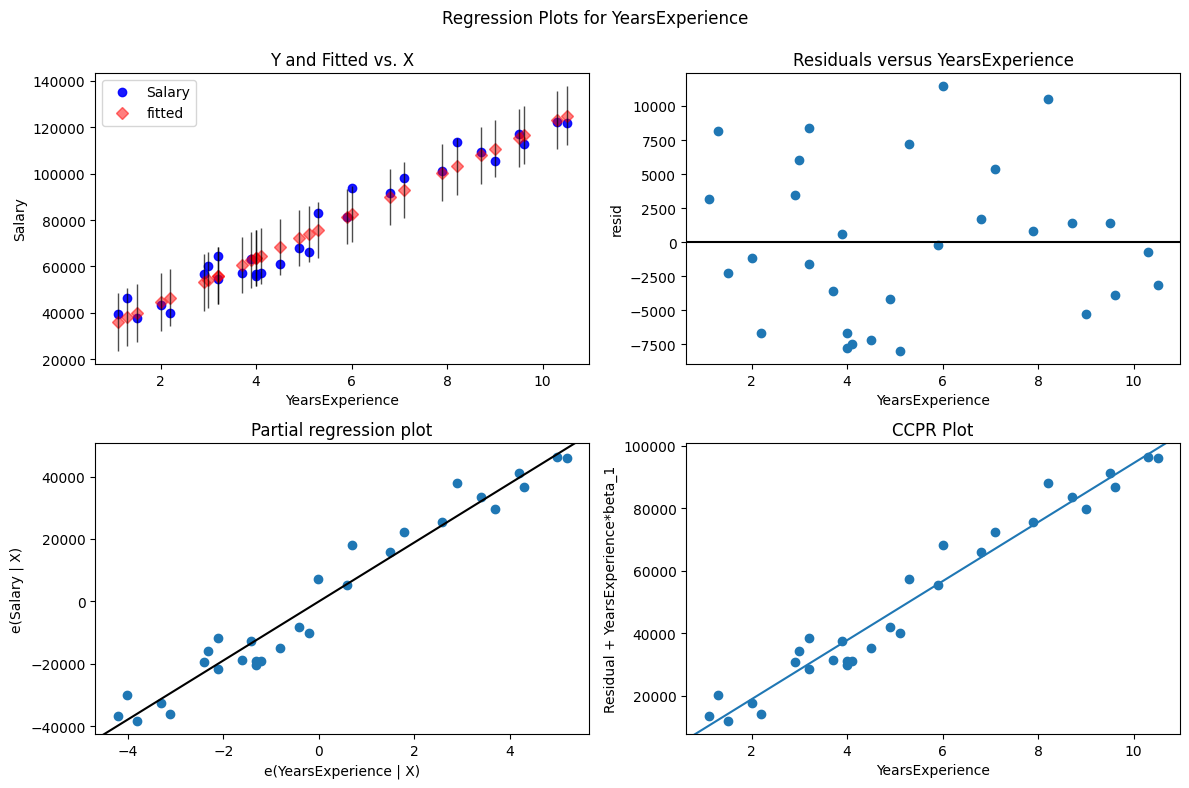

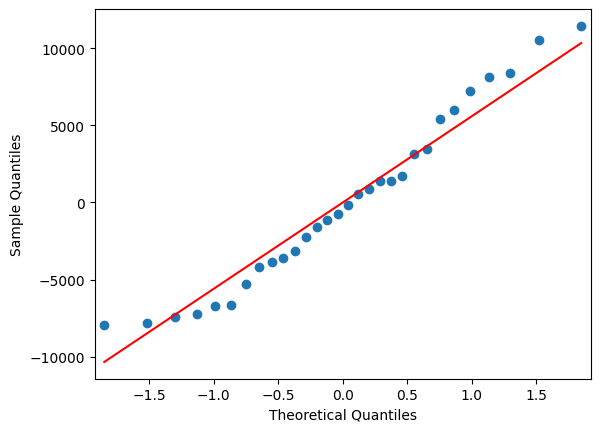

In [31]:
import statsmodels.api as sm

# Residuals vs Fitted plot for checking homoscedasticity
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_regress_exog(model, 'YearsExperience', fig=fig)

# Q-Q plot for checking normality of residuals
fig = sm.qqplot(model.resid, line='s')
plt.show()

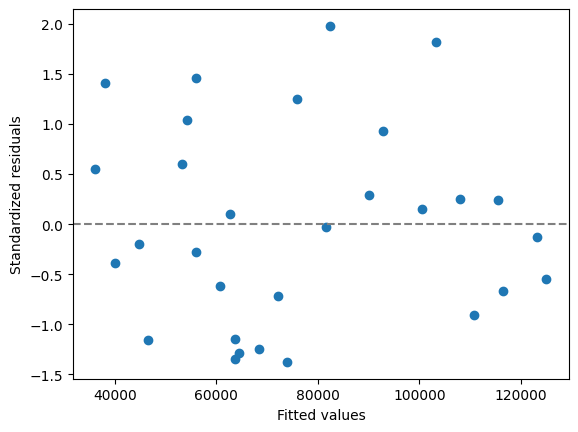

In [32]:
# Scale-Location plot (Residuals vs Fitted)
plt.scatter(model.fittedvalues, model.resid_pearson)
plt.axhline(y=0, color='gray', linestyle='dashed')
plt.xlabel('Fitted values')
plt.ylabel('Standardized residuals')
plt.show()

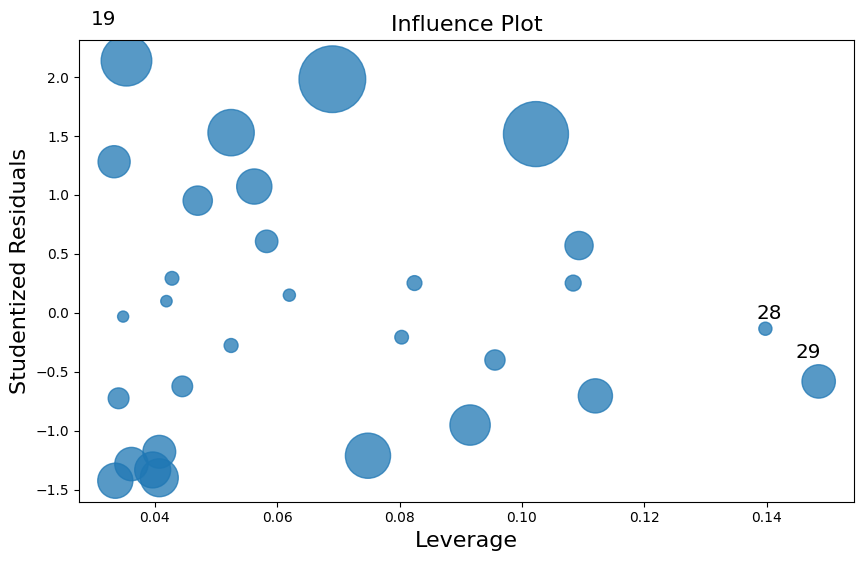

In [33]:
# Leverage plot for checking influential cases
fig, ax = plt.subplots(figsize=(10,6))
fig = sm.graphics.influence_plot(model,
                                 ax=ax,
                                 criterion="cooks")

## The Machine Learning Approach 

### Splitting Data 

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
feature = salary['YearsExperience'].values
target = salary['Salary'].values

In [36]:
X_train, X_test, y_train, y_test = train_test_split(feature, target,
    test_size=0.2,
    random_state=0
)

# Print the shape of the subsets
print(f"The X_train shape is: {X_train.shape}")
print(f"The X_test shape is: {X_test.shape}")
print(f"The y_train shape is: {y_train.shape}")
print(f"The y_test shape is: {y_test.shape}")

The X_train shape is: (24,)
The X_test shape is: (6,)
The y_train shape is: (24,)
The y_test shape is: (6,)


Sklearn requires the features to be of two-dimensional shape, thus we need to reshape the X_train and X_test

In [37]:
# We need to reshape the X_train and X_test
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [38]:
print(f"The X_train shape is: {X_train.shape}")
print(f"The X_test shape is: {X_test.shape}")
print(f"The y_train shape is: {y_train.shape}")
print(f"The y_test shape is: {y_test.shape}")

The X_train shape is: (24, 1)
The X_test shape is: (6, 1)
The y_train shape is: (24, 1)
The y_test shape is: (6, 1)


### Model Fitting 

In [39]:
# Import the linear regression model
from sklearn.linear_model import LinearRegression

In [40]:
# Create a Linear Regression model instance
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

### Prediction 

In [41]:
# Make predictions using the testing set
y_pred = model.predict(X_test)
print(y_pred)

[[ 40748.96184072]
 [122699.62295594]
 [ 64961.65717022]
 [ 63099.14214487]
 [115249.56285456]
 [107799.50275317]]


In [42]:
coef_df = pd.DataFrame({'Intercept': model.intercept_,
                        'Coef': model.coef_.flatten()})
coef_df

,Intercept,Coef
0,26780.099151,9312.575127


$$\text{Salary} = 26780.099151 + \text{9312.575127} \times \text{Years of Experience}$$


### Model Evaluation

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [44]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [45]:
# Adjusted R-squared
# -----------------

n = len(y_test)                                      # Number of observations
p = X_train.shape[1]                                 # Number of predictors (features)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [46]:
print(f"{'Model Coefficients':<35}: {model.coef_}")
print(f"{'Model Intercept':<35}: {model.intercept_}")

print(f"{'Mean squared error (MSE)':<35}: {mse}")
print(f"{'Root Mean squared error (MSE)':<35}: {rmse}")
print(f"{'Mean absolute error (MAE)':<35}: {mae}")

print(f"{'Coefficient of Determination (R^2)':<35}: {r2}")
print(f"{'Adjusted R-squared':<35}: {adjusted_r2}")

Model Coefficients                 : [[9312.57512673]]
Model Intercept                    : [26780.09915063]
Mean squared error (MSE)           : 12823412.298126549
Root Mean squared error (MSE)      : 3580.979237321343
Mean absolute error (MAE)          : 2446.1723690465055
Coefficient of Determination (R^2) : 0.988169515729126
Adjusted R-squared                 : 0.9852118946614076


## Regression Plot on Training Data

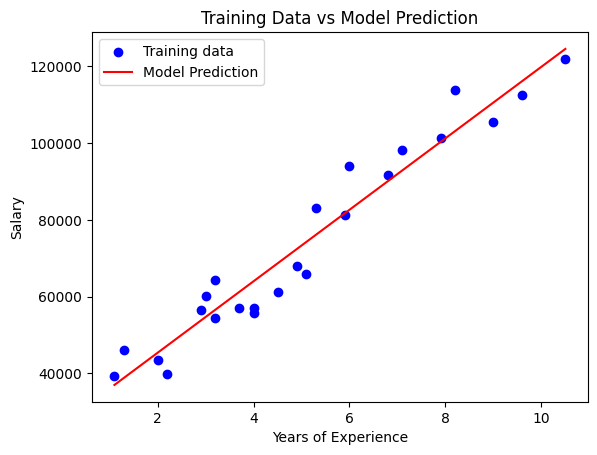

In [47]:
plt.scatter(X_train, y_train, color='blue', label='Training data')

# Predictions will be plotted as a line plot
# For the line plot, you need to sort the values because the line plot connects points 
# in the order they are provided


sorted_idx = np.argsort(X_train.flatten())

plt.plot(X_train[sorted_idx],
         model.predict(X_train)[sorted_idx],
         color='red', 
         label='Model Prediction')

plt.title('Training Data vs Model Prediction')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

### The Predicted Vs Actual 

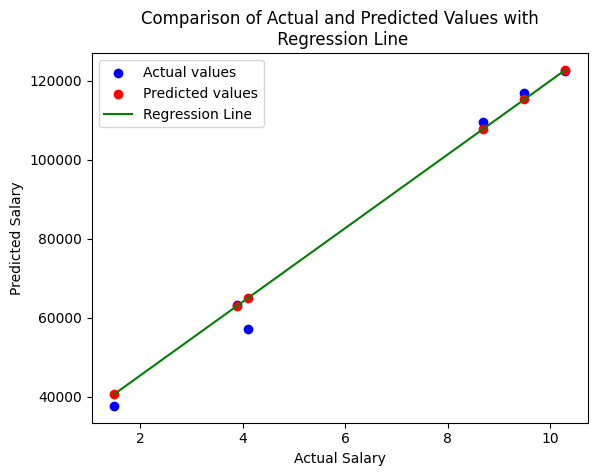

In [48]:
# Scatter plot for actual vs. predicted values
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.scatter(X_test, y_pred, color='red', label='Predicted values')

# Adding regression line
# Sort the values of X_test for a continuous line
sorted_order = np.argsort(X_test.flatten())
plt.plot(X_test[sorted_order], y_pred[sorted_order], color='green', label='Regression Line')

plt.title('Comparison of Actual and Predicted Values with\n Regression Line')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.show()

## The `lmplot()` Function from Seaborn

In [49]:
# Predict y based on X_test
y_pred = model.predict(X_test)

# Create a DataFrame for the test data
test_data = pd.DataFrame({
    'YearsExperience': X_test.flatten(),  
    'Salary': y_test.flatten()
})

In [50]:
# Create a DataFrame for the predicted data
predicted_data = pd.DataFrame({
    'YearsExperience': X_test.flatten(),  
    'Salary': y_pred.flatten()
})

<Figure size 1000x600 with 0 Axes>

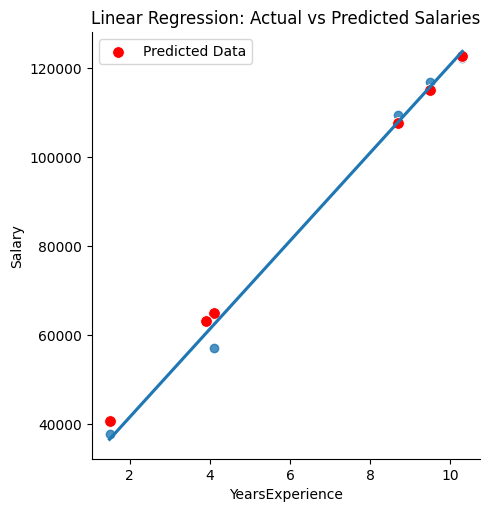

In [51]:
# Plotting using lmplot
plt.figure(figsize=(10, 6))
sns.lmplot(x='YearsExperience',
           y='Salary',
           data=test_data,
           ci=None
          )
sns.scatterplot(x='YearsExperience',
                y='Salary',
                data=predicted_data,
                color='red', 
                label='Predicted Data',
                s = 72)

plt.legend()
plt.title('Linear Regression: Actual vs Predicted Salaries')
plt.show()

---

## Cross Validation

In [52]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Assuming X and y are your features and target variable
# Create a Linear Regression model instance
model = LinearRegression()

# Apply k-fold cross-validation
# Let's use 5 folds for this example
X = salary['YearsExperience'].values.reshape(-1, 1)
y = salary['Salary'].values
print(X.shape)

(30, 1)


In [53]:
k = 5
scores = cross_val_score(model, X, y, 
                         cv=k,
                         scoring='neg_mean_squared_error')

# The scores are returned as negative mean squared errors
# Convert them to positive
mse_scores = -scores

# Calculate RMSE (Root Mean Squared Error)
rmse_scores = np.sqrt(mse_scores)

# Output the results
print(f"Cross-Validated RMSE scores: {rmse_scores}")
print(f"Mean RMSE: {rmse_scores.mean()}")

Cross-Validated RMSE scores: [5089.70910462 5565.4891967  7731.79553004 8271.45925566 5980.52992967]
Mean RMSE: 6527.7966033386965


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

# Assuming X and y are your features and target variable
model = LinearRegression()

# Define the K-Fold cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

# Apply K-Fold cross-validation
scores = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')

# Convert scores to positive mean squared errors
mse_scores = -scores

# Calculate RMSE (Root Mean Squared Error)
rmse_scores = np.sqrt(mse_scores)

# Output the results
print(f"Cross-Validated RMSE scores: {rmse_scores}")
print(f"Mean RMSE: {rmse_scores.mean()}")

Cross-Validated RMSE scores: [7165.0557215  6292.9917773  4805.45421474 6842.30395284 5849.69174577]
Mean RMSE: 6191.099482429328


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
import numpy as np

# Assuming X and y are your features and target variable
# Create a Linear Regression model instance
model = LinearRegression()

# Define the k-fold cross-validator (k=5, repeated 3 times)
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)

# Apply repeated k-fold cross-validation
scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')

# Convert scores to positive mean squared errors
mse_scores = -scores

# Calculate RMSE (Root Mean Squared Error)
rmse_scores = np.sqrt(mse_scores)

# Output the results
print(f"Cross-Validated RMSE scores: {rmse_scores}")
print(f"Mean RMSE: {rmse_scores.mean()}")

Cross-Validated RMSE scores: [7165.0557215  6292.9917773  4805.45421474 6842.30395284 5849.69174577
 5333.04136859 6449.82273093 6803.6192882  3538.07977923 6550.79450146
 6923.63450543 7375.16736599 5133.57136618 6164.71130138 6400.96555692
 5809.99414415 6249.6347223  5899.84937899 5111.42346469 7723.55442392
 5252.0557382  4691.0455512  7729.93597669 3901.30466832 6567.72540737
 6197.37517536 6367.20271194 4717.37328085 5617.2733318  6330.4953273
 5518.62115482 4358.95800422 6429.19456814 7178.82715819 6079.23616513
 3212.86235224 5604.89929071 8305.57329869 5538.2650702  6066.25244614
 7151.54558565 5957.65839334 6485.82642303 4173.70539773 4649.33963118
 7681.39507317 4972.89594621 5828.04212625 3508.51806588 6018.01983735]
Mean RMSE: 5890.295689356509


<div style="text-align:center;font-size:22pt;font-weight:bold;color:indigo;border:solid black 2pt;background-color:lightgrey;">
    Support Vector Regressor
<div/>

In [56]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
# Reshape if X is one-dimensional (simple regression)
X = X.reshape(-1, 1) if X.ndim == 1 else X
y = y.reshape(-1, 1) if y.ndim == 1 else y

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Create the SVR model with a specific kernel
svr = SVR(kernel='rbf')

# Train the model
svr.fit(X_train, y_train.ravel())  # using ravel() to convert y_train to 1D array

SVR()

In [59]:
# Predicting using the test set
y_pred = svr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Coefficient of Determination (R^2): {r2}")

Mean Squared Error: 952217496.8844253
Coefficient of Determination (R^2): -0.8641837486109101


In [60]:
rmse

30858.02159705682

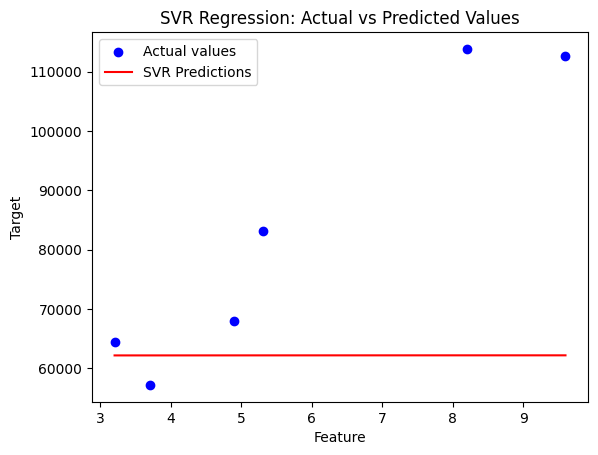

In [61]:
import matplotlib.pyplot as plt

# Plotting the actual test data
plt.scatter(X_test, y_test, color='blue', label='Actual values')

# Plotting the SVR model's predictions
# For a continuous line plot, we need to sort X_test and corresponding y_pred
sorted_idx = np.argsort(X_test.flatten())
plt.plot(X_test[sorted_idx], y_pred[sorted_idx], color='red', label='SVR Predictions')

plt.title('SVR Regression: Actual vs Predicted Values')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Example values
    'gamma': [1, 0.1, 0.01, 0.001],  # Example values
    'kernel': ['rbf', 'poly', 'sigmoid'],  # 'linear' is also an option
    'epsilon': [0.1, 0.01, 0.001, 0.0001]  # Example values
}

# Create SVR model
svr = SVR()

# Define GridSearchCV
grid_search = GridSearchCV(estimator=svr,
                           param_grid=param_grid, 
                           cv=5,
                           n_jobs=-1,
                           verbose=2,
                           scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train.ravel())

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

# Use the best estimator for further predictions
best_svr = grid_search.best_estimator_

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Parameters: {'C': 0.1, 'epsilon': 0.0001, 'gamma': 1, 'kernel': 'poly'}
Best Score: 140541340.0159905


In [63]:
# Refit the SVR model with the best parameters found
best_svr = grid_search.best_estimator_

# Fit the model on the entire training data
best_svr.fit(X_train, y_train.ravel())

# Make predictions using the test set
y_pred = best_svr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Coefficient of Determination (R^2): {r2}")

Mean Squared Error: 140404426.08613417
Coefficient of Determination (R^2): 0.7251261920735516


## Support Vector Regression Predictions

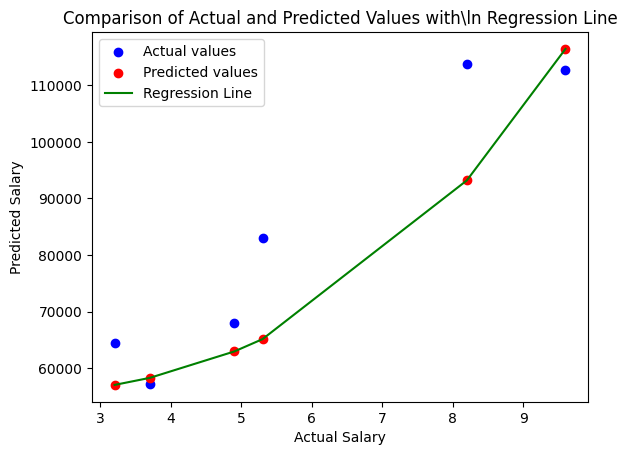

In [65]:
# Scatter plot for actual vs. predicted values
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.scatter(X_test, y_pred, color='red', label='Predicted values')

# Adding regression line
# Sort the values of X_test for a continuous line
sorted_order = np.argsort(X_test.flatten())
plt.plot(X_test[sorted_order], y_pred[sorted_order], color='green', label='Regression Line')

plt.title('Comparison of Actual and Predicted Values with\ln Regression Line')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.show()

### References

1. [Seaborn documentation](https://seaborn.pydata.org/)
2. [matplotlib documentation](https://matplotlib.org/stable/index.html)
3. [Statsmodels documentation](https://www.statsmodels.org/stable/index.html)
4. [sklearn documentation](https://scikit-learn.org/stable/)